In [3]:
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)


quantificators = ["CC", "ACC", "PCC", "PACC", "HDy", "EMQ","MLPE"]
error = "bias"
dateexperiment = "2022_06_23_09_39"

mean_error_methods = {}

writer = pd.ExcelWriter('results/concept/excel/errors_%s.xlsx' % dateexperiment, engine='xlsxwriter')
for quant_name in quantificators:
    results = pd.read_csv("results/concept/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results['MAE'] = results['error'].abs()
    results_mean = results.groupby(['cut_point_train', 'cut_point_test'])['MAE'].mean().reset_index()
    #convert to matrix form
    results_mean = results_mean.pivot(index='cut_point_train', columns='cut_point_test', values='MAE')
    mean_error_methods[quant_name]=results_mean.mean().mean()
   
    print("Results for method %s. Mean MAE: %f" % (quant_name, mean_error_methods[quant_name]))
    cm = sns.light_palette('red', as_cmap=True)
    display(results_mean.style.background_gradient(cmap=cm,low=0,high=1))
    results_mean.to_excel(writer, sheet_name=quant_name)
    workbook = writer.book
    worksheet = writer.sheets[quant_name]
    # Apply a conditional format to the cell range.
    worksheet.conditional_format('B2:D4', {'type': '2_color_scale','min_type':'num','max_type':'num','min_value':'0','max_value':'1','min_color':'#f3f0f0','max_color':'#ff0000'})
writer.close()

Results for method CC. Mean MAE: 0.039838


cut_point_test,2,3,4
cut_point_train,,,
2,0.025184,0.009064,0.028196
3,0.046068,0.017088,0.034880
4,0.109900,0.068956,0.019204


Results for method ACC. Mean MAE: 0.057327


cut_point_test,2,3,4
cut_point_train,,,
2,0.020068,0.044055,0.078263
3,0.059498,0.017511,0.060375
4,0.137113,0.075745,0.023315


Results for method PCC. Mean MAE: 0.034076


cut_point_test,2,3,4
cut_point_train,,,
2,0.007177,0.020305,0.037294
3,0.038100,0.009079,0.032297
4,0.092854,0.055850,0.013724


Results for method PACC. Mean MAE: 0.058772


cut_point_test,2,3,4
cut_point_train,,,
2,0.021442,0.041601,0.079110
3,0.057871,0.018764,0.063321
4,0.144339,0.082831,0.019665


Results for method HDy. Mean MAE: 0.066494


cut_point_test,2,3,4
cut_point_train,,,
2,0.019005,0.056611,0.090828
3,0.072656,0.018490,0.072317
4,0.151246,0.094823,0.022472


Results for method EMQ. Mean MAE: 0.058231


cut_point_test,2,3,4
cut_point_train,,,
2,0.014336,0.043914,0.075332
3,0.066386,0.013504,0.062819
4,0.149570,0.084079,0.014141


Results for method MLPE. Mean MAE: 0.000932


cut_point_test,2,3,4
cut_point_train,,,
2,0.000720,0.000720,0.000732
3,0.001062,0.001055,0.001048
4,0.001019,0.001014,0.001015


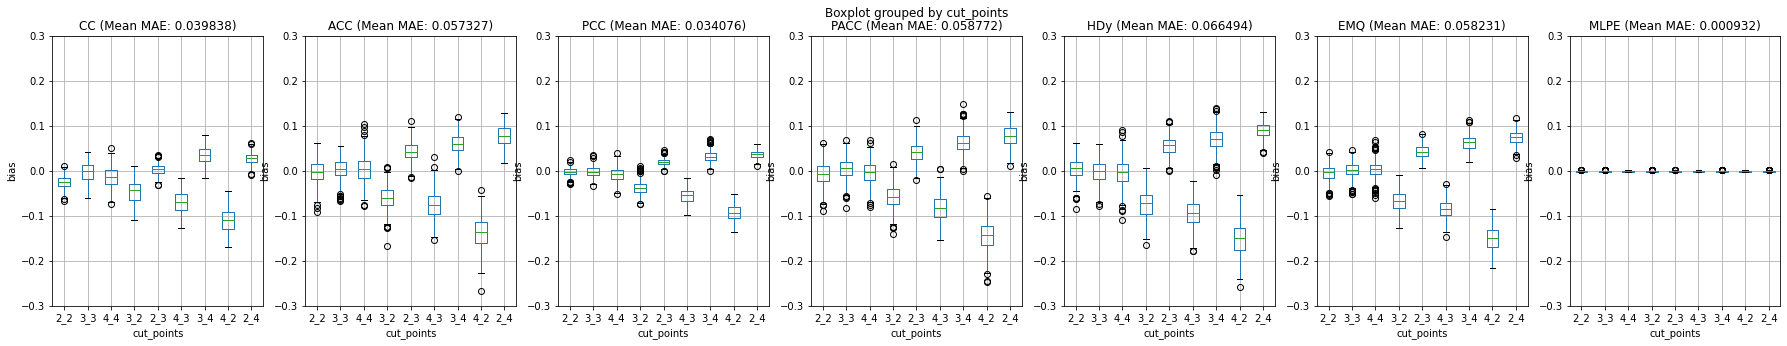

In [14]:
from natsort import index_natsorted

fig, ax = plt.subplots(1,len(quantificators),figsize=(30,5))

order = ("2_2","3_3","4_4","3_2","2_3","4_3","3_4","4_2","2_4")

for k,quant_name in enumerate(quantificators):
    results = pd.read_csv("results/concept/results_%s_%s.csv" % (dateexperiment,quant_name),index_col=0)
    results['cut_points'] = results['cut_point_train'].astype(str)+'_'+results['cut_point_test'].astype(str)
    results.cut_points = results.cut_points.astype("category")
    results['cut_points'] = results.cut_points.cat.set_categories(order)
    results = results.sort_values(["cut_points"])
    ax[k].set_ylim(-0.3, 0.3)
    ax[k].set_ylabel(error)
    fig.tight_layout()

    results.boxplot(ax=ax[k],column='error',by='cut_points')
    ax[k].set_title("%s (Mean %s: %f)"  % (quant_name,'MAE',mean_error_methods[quant_name]))